

<div class="usecase-title">Business establishments  (land use) and jobs</div>

<div class="usecase-authors"><b>Authored by: Harsh Dwivedi</b> </div>

<div class="usecase-duration"><b>Duration:</b> 100 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python & Matlplotlib & Machine Learning Basics</div>
</div>

<header>
<h2>Scenario</h2>
<div>This use case aims to help urban planners to understand the intricate dynamics between business establishments, land use, and employment patterns within CLUE locations. By leveraging the City of Melbourne’s Census of Land Use and Employment (CLUE) dataset, this analysis aims to uncover valuable insights that can guide strategic decisions. The primary objective is to identify potential business locations, attract employees in specific job sectors, and optimize resource allocation. This, in turn, will contribute to fostering economic growth and creating vibrant, sustainable communities within the city.
We will be gaining n a comprehensive understanding of how spatial and employment data interact. By analyzing correlations between business establishments and employment patternswe willan pinpoint optimal business locations and develop data-driven urban development strategies

I believe this s holistic approach not only supports economic development but also enhances the overall quality of life for Melbourne’s residentsdiv>

## Learning Objectives

At the end of this use case you will:

* Understand how to analyze spatial and employment data.
* Identify correlations between business establishments and employment patterns.
* Gain insights into optimal business locations.
* Learn how to use data to inform urban development strategies.
* Develop skills in data visualization and interpretationnd interpretation.}

## Introduction

In the bustling city of Melbourne, urban planners and policymakers are tasked with the challenge of understanding the intricate dynamics between business establishments, land use, and employment patterns. The City of Melbourne’s Census of Land Use and Employment (CLUE) dataset provides a wealth of information that can be leveraged to gain insights into these relationships.

The objective of this analysis is to examine business establishments within CLUE locations and explore land usage across various sectors of employment. By doing so, business owners and stakeholders can identify potential business locations, attract employees in specific job sectors, and optimize resource allocation. This, in turn, contributes to economic growth and the creation of vibrant, sustainable communities within Melbourn

Datasets:

-
Data Set 1 [Blocks for Census of Land Use](https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/table/?location=15,-37.79026,144.88366&basemap=mbs-7a7333on<br>This dataset maps CLUE datasets to CLUE blocks, providing geographical boundaries that can be linked to CLUE information. It includes data on establishments, employment, and floor space from 2002 to 2019.s. The dataset is imported from Melbourne Open Data website, using API v2.PEta:

-
Data Set 2 [Jobs per CLUE industry ](https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/export/).<br>This dataset covers employment data from 2002 to 2022, showing the number of jobs per CLUE block, classified by industry and small area allocation. It has been confidentialized to protect commercially sensitive information.

-
Data Set 3 [Floor space per space use ](https://data.melbourne.vic.gov.au/explore/dataset/floor-space-by-use-by-block/information//).<br>This dataset shows floor space (in square meters) per CLUE block, classified by their space use and small area allocation. It covers the period from 2002 to 2022 and has been confidentialized to protect commercially sensitive information. 

## Importing all the desired Dependencies 

First, we need to import the necessary libraries for data analysis and visualization.

In [44]:

import plotly.express as px 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import folium
import seaborn as sns
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import os
import json
import io
import requests
import pandas as pd

## Loading the dataset with help of API V2
Define a function to collect data from the API.

In [14]:
# **Preferred Method**: Export Endpoint
import requests
import pandas as pd
from io import StringIO

#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key #use if use datasets API_key permissions
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey  #use if use datasets API_key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Loading 1st dataset

In [16]:
# Set dataset_id to query for the API call dataset name
dataset_id_1 = 'blocks-for-census-of-land-use-and-employment-clue'
# Save dataset to df varaible
df = collect_data(dataset_id_1)
# Check number of records in df
print(f'The dataset contains {len(df)} records.')
# View df
df.head(3)

The dataset contains 606 records.


,geo_point_2d,geo_shape,block_id,clue_area
0,"-37.82296169692379, 144.95049282288122","{""coordinates"": [[[144.9479230372, -37.8233694...",1112,Docklands
1,"-37.78537422996195, 144.94085920366408","{""coordinates"": [[[144.9426153438, -37.7866287...",927,Parkville
2,"-37.777687358375964, 144.94600024715058","{""coordinates"": [[[144.9425926939, -37.7787229...",929,Parkville


### Loading 2nd dataset

In [18]:
dataset_id_2 = 'employment-by-block-by-clue-industry'
df2 = collect_data(dataset_id_2)



### Loading 3rd dataset

In [20]:
dataset_id_3 = 'floor-space-by-use-by-block'
df3 = collect_data(dataset_id_3)
print(f'The second dataset contains {len(df3)} records.')
print(df3.head(3))

The second dataset contains 12394 records.
   census_year  block_id  clue_small_area  commercial_accommodation  \
0         2013      2387  North Melbourne                       0.0   
1         2013      2390  North Melbourne                       0.0   
2         2013      2501       Kensington                       0.0   

   common_area  community_use  educational_research  \
0          NaN            0.0                   NaN   
1       1040.0            0.0                   NaN   
2          0.0            NaN                   0.0   

   entertainment_recreation_indoor  equipment_installation  hospital_clinic  \
0                              NaN                     0.0              0.0   
1                              0.0                     0.0              0.0   
2                              0.0                     0.0              0.0   

   ...  transport  transport_storage_uncovered  unoccupied_under_construction  \
0  ...        0.0                          0.0       

##  Cleaning the data

Let's start by cleaning and preprocessing the datasets to make them ready for analysis.We will handle missing values, converting data types, and merging datasets.

In [23]:
df['coordinates'] = df['geo_shape'].apply(lambda x: json.loads(x)['coordinates'])
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Clean employment dataset
df2.fillna(0, inplace=True)

# Clean floor space dataset
df3.fillna(0, inplace=True)

## Merging the datsets
We merged the spatial layer, employment, and floor space datasets on common columns such as block_id and census_year to create a comprehensive dataset for analysis.

In [25]:
merged_data = df.merge(df2, on='block_id')
merged_data = merged_data.merge(df3, on=['block_id', 'census_year', 'clue_small_area'])


## Data Analysis and Visualization

Now let's start with a bar plot showing the distribution of business establishments across different CLUE small areas.Kensington has the highest number of business .

### Distribution of Business Establishments by CLUE Small Area

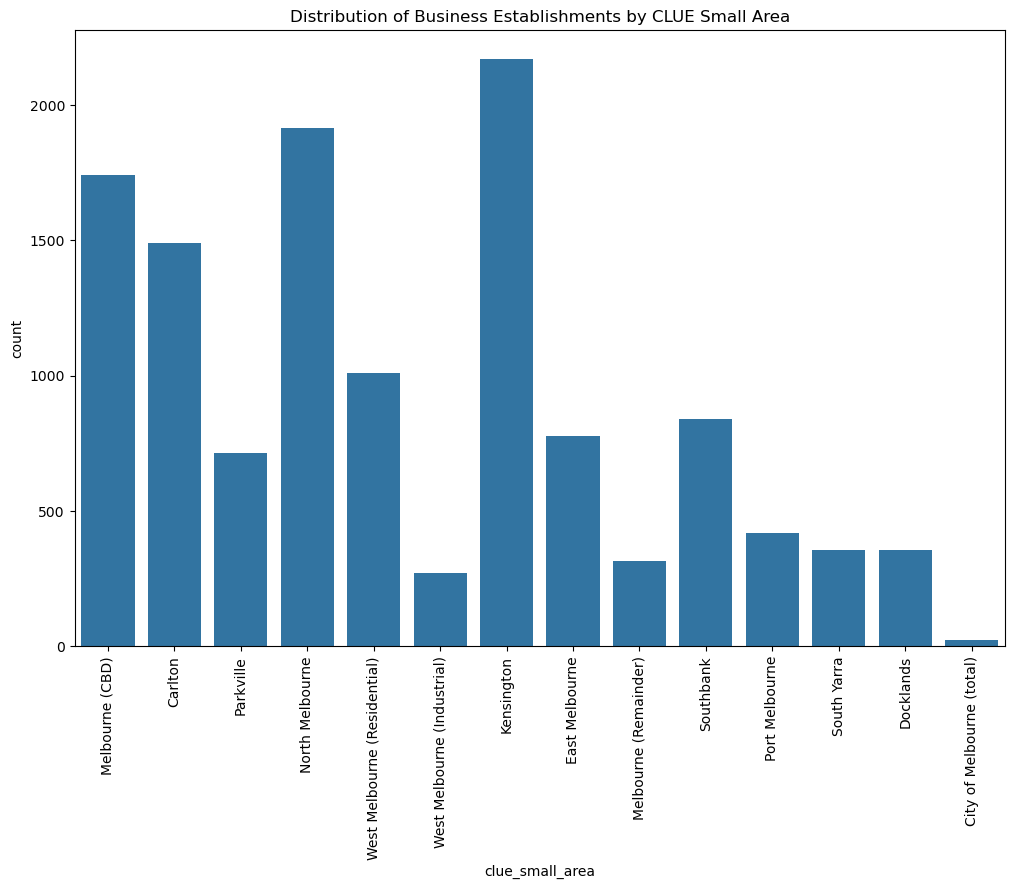

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='clue_small_area')
plt.title('Distribution of Business Establishments by CLUE Small Area')
plt.xticks(rotation=90)
plt.show()


### Employment Patterns Over Time
Now, we will start exploring the data by visualizing employment patterns over different decades. This will help us understand how employment has evolved in various CLUE small areas over time. By aggregating the data by decade, we can identify broader trends and gain insights into long-term changes in employment distribution.

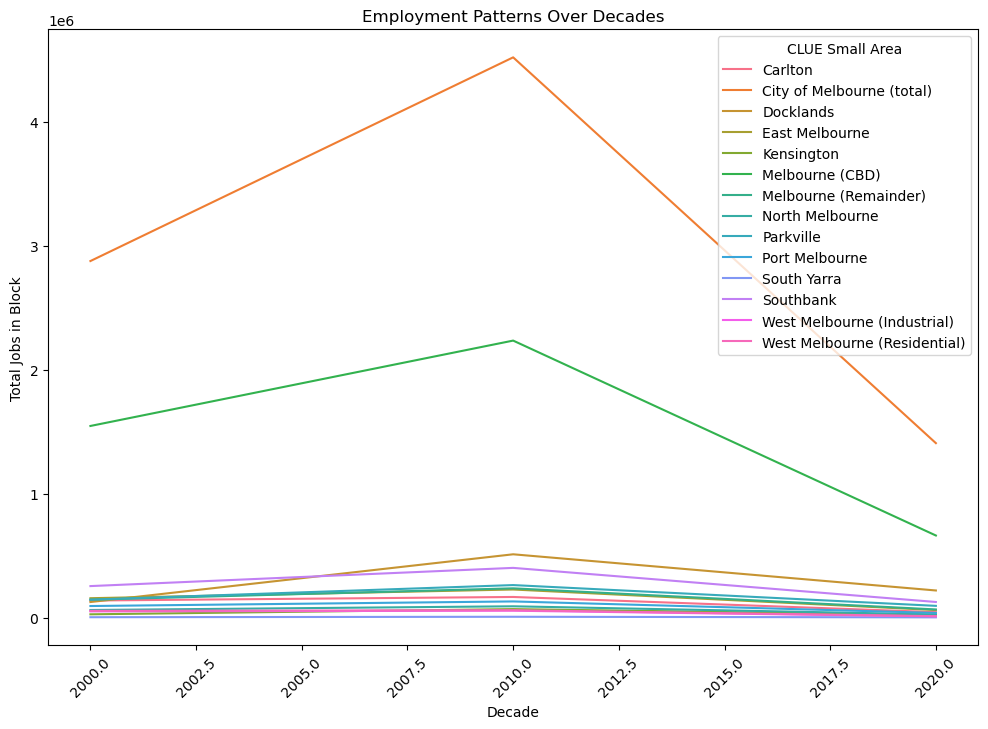

In [30]:
# Aggregate data by decade
df2['decade'] = (df2['census_year'] // 10) * 10
aggregated_data = df2.groupby(['decade', 'clue_small_area']).agg({'total_jobs_in_block': 'sum'}).reset_index()

# Plot the aggregated data
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_data, x='decade', y='total_jobs_in_block', hue='clue_small_area')
plt.title('Employment Patterns Over Decades')
plt.xticks(rotation=45)
plt.xlabel('Decade')
plt.ylabel('Total Jobs in Block')
plt.legend(title='CLUE Small Area')
plt.show()



### Spatial Distribution of Employment

Finally, we will plot the spatial distribution of employment using a choropleth map. This map will show the total number of jobs in each block, allowing us to visualize employment density across Melbourne.

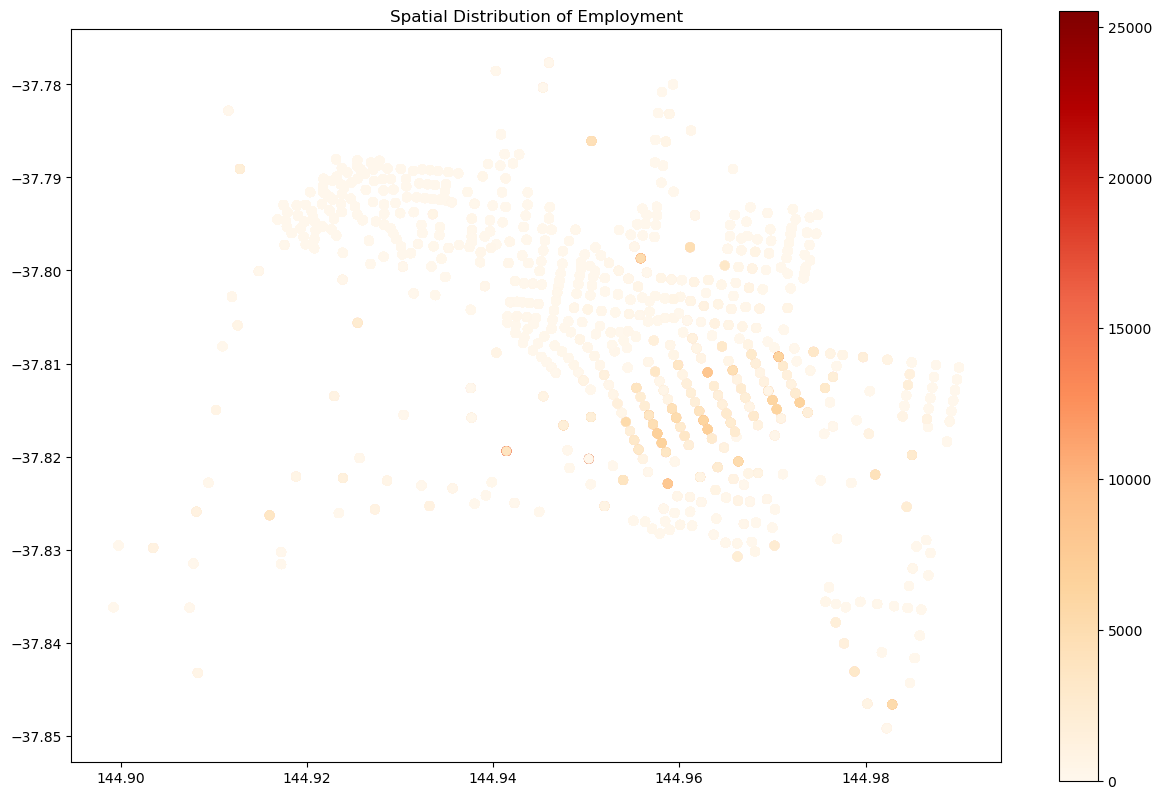

In [32]:
# Ensure the 'geo_point_2d' column is split correctly
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Merge spatial layer with employment data
merged_data = df.merge(df2, left_on='block_id', right_on='block_id')

# Convert merged_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['longitude'], merged_data['latitude']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='total_jobs_in_block', ax=ax, legend=True, cmap='OrRd')
plt.title('Spatial Distribution of Employment')
plt.show()


### Employment Patterns Over Time

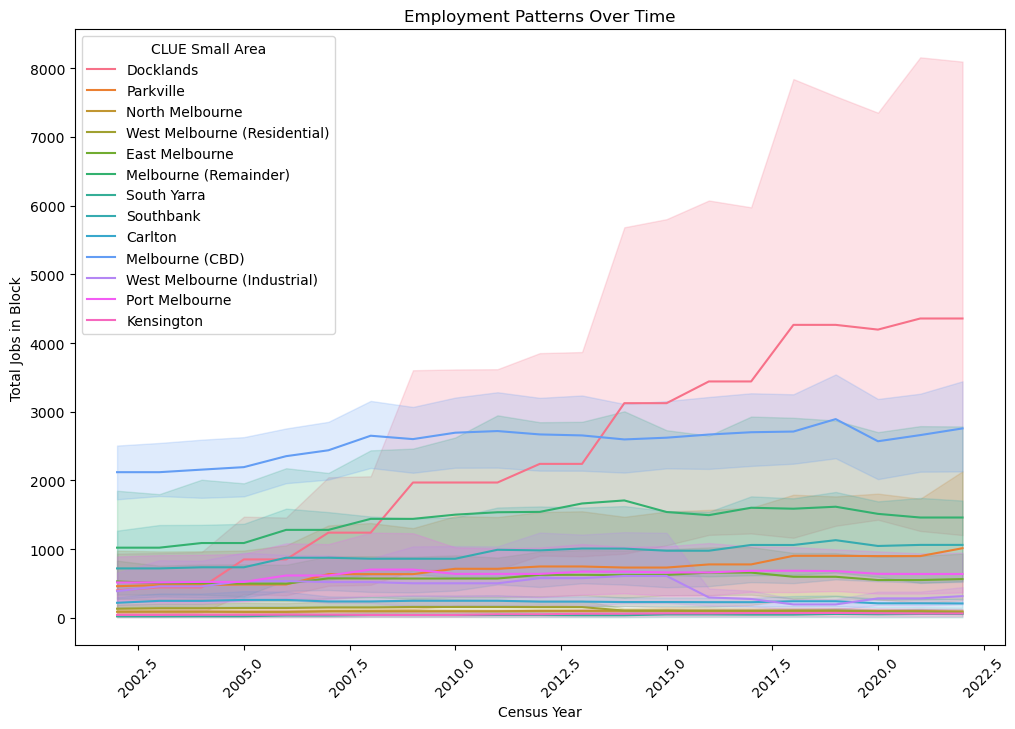

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data, x='census_year', y='total_jobs_in_block', hue='clue_small_area')
plt.title('Employment Patterns Over Time')
plt.xticks(rotation=45)
plt.xlabel('Census Year')
plt.ylabel('Total Jobs in Block')
plt.legend(title='CLUE Small Area')
plt.show()


### Spatial Distribution of Employment

In [52]:
# Interactive map
fig = px.scatter_mapbox(
    merged_data, 
    lat='latitude', 
    lon='longitude', 
    color='total_jobs_in_block', 
    size='total_jobs_in_block',
    mapbox_style="carto-positron", 
    title='Spatial Distribution of Employment',
    height=800  # Adjust the height of the map
)

# Update layout for better legend positioning and readability
fig.update_layout(
    legend=dict(
        title='Total Jobs in Block',
        x=0.99,  # Position the legend on the right
        y=0.99,  # Position the legend at the top
        traceorder='normal',
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

